<a href="https://colab.research.google.com/github/Shruti-codes/ML/blob/master/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.2.0


In [0]:
hello = tf.constant("Hello World")
hello

a = tf.constant(2)
b = tf.constant(3)

c = tf.add(a,b)
c

mean = tf.reduce_mean([a,b,c])
mean

sum = tf.reduce_sum([a,b,c])


In [15]:
mat1 = tf.constant([[1. , 2.] , [3., 4.]])
mat2 = tf.constant([[1. , 2.] , [3., 4.]])
mat3 = tf.matmul(mat1, mat2)
mat3

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 7., 10.],
       [15., 22.]], dtype=float32)>

In [16]:
#Linear Regression

#generate data
import numpy as np
import seaborn
X = 2*np.random.rand(100,1) #generate data between 0-2
y = 3*X+4 + np.random.randn(100,1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


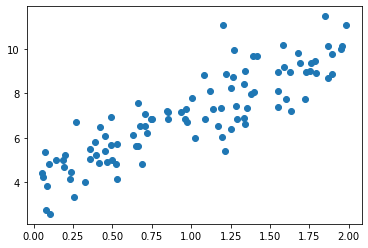

In [17]:
#visualise data
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.show()

n_samples = 1000
batch_size = 50

In [0]:
#forward function
def linear_reg(X,W,b):
  return tf.add(tf.multiply(X,W),b)

def mean_square(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true))

In [0]:
W = tf.Variable(np.random.randn(), name="weights")
b = tf.Variable(np.random.randn(), "bias")

optim = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD')

#optimization function
def run_optimization(X,y,W,b):
  with tf.GradientTape() as g:
    pred = linear_reg(X,W,b)
    loss = mean_square(pred, y)
  
  grad = g.gradient(loss, [W,b])    #compute gradient
  
  optim.apply_gradients(zip(grad, [W,b]))    #update gradient

In [20]:
for step in range(1,n_samples+1):
  run_optimization(X,y,W,b)

  if(step%batch_size==0):
    pred = linear_reg(X,W,b)
    loss = mean_square(pred,y)
    print("step = %i , loss = %f , weight = %f , bias = %f" % (step,loss,W.numpy(),b.numpy()))

step = 50 , loss = 2.429519 , weight = 4.189540 , bias = 1.883481
step = 100 , loss = 1.612667 , weight = 4.314037 , bias = 2.448575
step = 150 , loss = 1.427270 , weight = 4.158546 , bias = 2.708533
step = 200 , loss = 1.295711 , weight = 3.995894 , bias = 2.906739
step = 250 , loss = 1.198772 , weight = 3.852992 , bias = 3.074156
step = 300 , loss = 1.127296 , weight = 3.729925 , bias = 3.217607
step = 350 , loss = 1.074594 , weight = 3.624210 , bias = 3.340750
step = 400 , loss = 1.035736 , weight = 3.533431 , bias = 3.446487
step = 450 , loss = 1.007084 , weight = 3.455480 , bias = 3.537282
step = 500 , loss = 0.985958 , weight = 3.388544 , bias = 3.615245
step = 550 , loss = 0.970381 , weight = 3.331068 , bias = 3.682192
step = 600 , loss = 0.958896 , weight = 3.281714 , bias = 3.739676
step = 650 , loss = 0.950428 , weight = 3.239335 , bias = 3.789037
step = 700 , loss = 0.944184 , weight = 3.202945 , bias = 3.831423
step = 750 , loss = 0.939580 , weight = 3.171697 , bias = 3.867

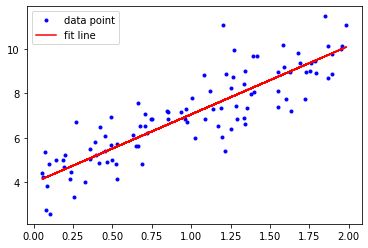

In [21]:
plt.plot(X,y,"b.", label = 'data point')
plt.plot(X, linear_reg(X,W,b),"r-", label = 'fit line')
plt.legend()
plt.show()

In [0]:
#Logistic Regression

mnist = tf.keras.datasets.mnist
(X_train, y_train) , (X_test, y_test) = mnist.load_data()
n_class = 10
n_feature = 784   #28*28

X_train , X_test = np.array(X_train, np.float32) , np.array(X_test , np.float32)
X_train, X_test = X_train.reshape([-1,n_feature]) , X_test.reshape([-1,n_feature])
X_train , X_test = X_train/255.0 , X_test/255.0

In [0]:
def logic_reg(X,W,b):
  return tf.nn.softmax(tf.add(tf.matmul(X,W),b))

def cross_entropy(pred,true):
  true = tf.one_hot(true, depth = n_class)
  pred = tf.clip_by_value(pred, 1e-9, 1.)

  return tf.reduce_mean(-tf.reduce_sum(true*tf.math.log(pred), 1))

def accuracy(pred, true):
  corr_pred = tf.equal(tf.argmax(pred, 1), tf.cast(true, tf.int64))
  return tf.reduce_mean(tf.cast(corr_pred, tf.float32))

In [0]:
optim = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD')

#optimization function
def run_optimization(X,y,W,b):
  with tf.GradientTape() as g:
    pred = logic_reg(X,W,b)
    loss = cross_entropy(pred, y)
  
  grad = g.gradient(loss, [W,b])    #compute gradient
  
  optim.apply_gradients(zip(grad, [W,b]))    #update gradient

In [25]:
n_samples = 1000
batch_size = 256
skip = 50

train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

W = tf.Variable(tf.ones([n_feature,n_class]), name="weights")
b = tf.Variable(tf.zeros([n_class]), "bias")

for step, (X,y) in enumerate(train_data.take(n_samples),1):
  run_optimization(X,y,W,b)

  if(step%skip==0):
    pred = logic_reg(X,W,b)
    loss = cross_entropy(pred,y)
    acc = accuracy(pred,y)
    print("step = %i , loss = %f , acc = %f" % (step,loss,acc))

step = 50 , loss = 1.850030 , acc = 0.781250
step = 100 , loss = 1.549331 , acc = 0.753906
step = 150 , loss = 1.359890 , acc = 0.796875
step = 200 , loss = 1.134130 , acc = 0.851562
step = 250 , loss = 1.060161 , acc = 0.843750
step = 300 , loss = 1.039527 , acc = 0.832031
step = 350 , loss = 0.973459 , acc = 0.816406
step = 400 , loss = 0.908185 , acc = 0.808594
step = 450 , loss = 0.782708 , acc = 0.863281
step = 500 , loss = 0.787786 , acc = 0.816406
step = 550 , loss = 0.778172 , acc = 0.871094
step = 600 , loss = 0.730400 , acc = 0.835938
step = 650 , loss = 0.727983 , acc = 0.859375
step = 700 , loss = 0.629135 , acc = 0.878906
step = 750 , loss = 0.625819 , acc = 0.863281
step = 800 , loss = 0.662853 , acc = 0.863281
step = 850 , loss = 0.638752 , acc = 0.878906
step = 900 , loss = 0.621170 , acc = 0.867188
step = 950 , loss = 0.548429 , acc = 0.914062
step = 1000 , loss = 0.602451 , acc = 0.867188


In [26]:
pred = logic_reg(X_test, W,b)
print("Accuracy = %f" %accuracy(pred, y_test))

Accuracy = 0.870600


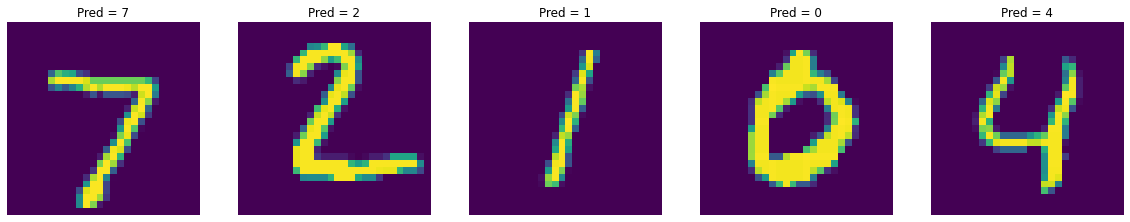

In [32]:
#visualise data
%matplotlib inline
import matplotlib.pyplot as plt

rows = 1
cols = 5
fig = plt.gcf()
fig.set_size_inches(cols*4, rows*4)

n = 5
test = X_test[:n]
pred = logic_reg(test, W,b)

for i in range(n):
  sp = plt.subplot(rows, cols, i+1, title = 'Pred = %i' % np.argmax(pred.numpy()[i]))
  sp.axis('Off')
  plt.imshow(np.reshape(test[i], [28,28]))

plt.show()

In [0]:
#Neural Networks